# Indian Startup


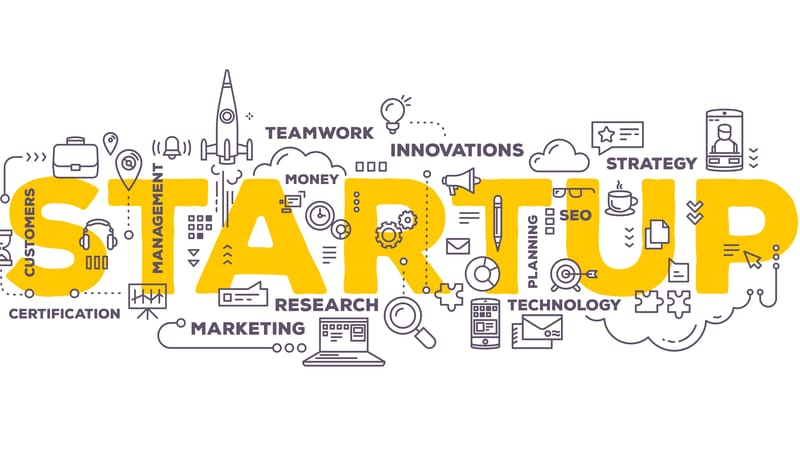

In [3]:
#import required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#load dataset
df = pd.read_csv('startup_funding.csv')

In [5]:
#the shape of the dataset.
df.shape

(2372, 10)

In [6]:
# Check the first few rows of the DataFrame

df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [7]:
#Data type of each column
df.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [10]:
df.describe()

,SNo
count,2372.000000
mean,1185.500000
std,684.881742
min,0.000000
25%,592.750000
50%,1185.500000
75%,1778.250000
max,2371.000000


In [11]:
#checking for null value
df.isnull == True

False

In [14]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

# Number of Fundings

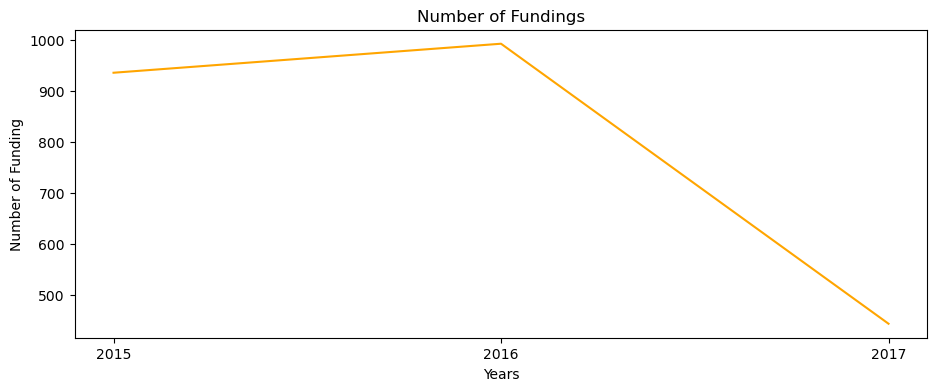

2015 - 936
2016 - 993
2017 - 443


In [62]:
year =df['Date'].str.slice(-4,)
year_count = year.value_counts().sort_index()

plt.figure(figsize= (11,4))
plt.plot(year_count.index , year_count.values, color = "orange")
plt.title("Number of Fundings")
plt.xlabel("Years")
plt.ylabel("Number of Funding")
plt.show()

for year , count in year_count .items():
    print(year,"-",count)

In [15]:
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


# Top Indian Cities

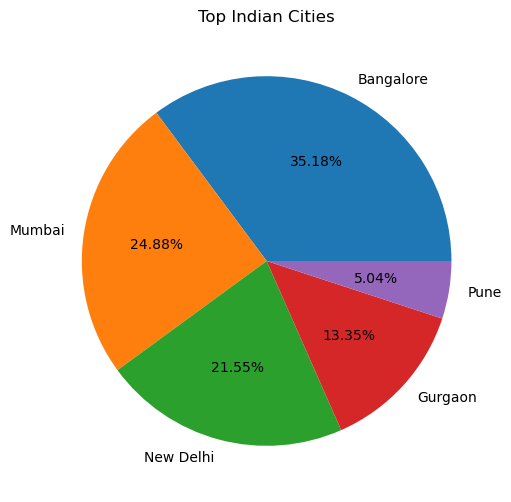

Bangalore - 635
Mumbai - 449
New Delhi - 389
Gurgaon - 241
Pune - 91


In [20]:
df.dropna(subset = 'CityLocation', inplace = True)
def sc(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(sc)
df['CityLocation'].replace("bangalore" , "Bangalore", inplace = True)
df['CityLocation'].replace("delhi" , "New Delhi", inplace = True)
a = df['CityLocation'].value_counts()[:5]

plt.figure(figsize = (12,6))
label = a.index
plt.pie(a , labels = label , autopct = "%.2f%%")
plt.title("Top Indian Cities")
plt.show()
for City , Count in a.items():
    print(City ,"-",Count)



# Funding Amount

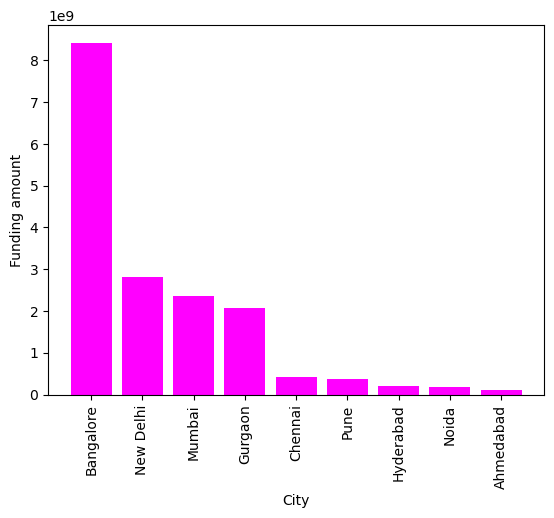

Bangalore 49.82
New Delhi 16.67
Mumbai 13.93
Gurgaon 12.24
Chennai 2.43
Pune 2.17
Hyderabad 1.16
Noida 1.01
Ahmedabad 0.58


In [37]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv')
df = df.dropna(subset = ['CityLocation'])

def sc(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(sc)


df['CityLocation'].replace('Delhi',"New Delhi",inplace=True)
df['CityLocation'].replace('bangalore',"Bangalore",inplace=True)

df["AmountInUSD"]=df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df["AmountInUSD"]=pd.to_numeric(df["AmountInUSD"])
city_amount=df.groupby('CityLocation')["AmountInUSD"].sum().sort_values(ascending=False)[0:9]
city=city_amount.index
amountcity=city_amount.values
peramount=np.true_divide(amountcity, amountcity.sum())*100

plt.bar(city,amountcity , color = "magenta") 
plt.xticks(rotation = 90)
plt.ylabel("Funding amount")
plt.xlabel("City")
plt.show()
for i in range(len(city)):
    print(city[i], format(peramount[i],'.2f'))

# Investment Type

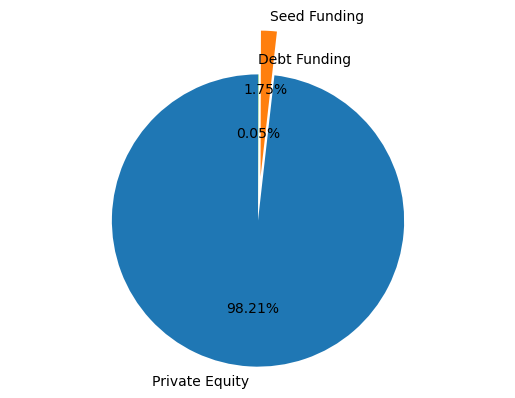

Private Equity 98.21
Seed Funding 1.75
Debt Funding 0.05


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (assuming df_start is the correct DataFrame)
df_start = pd.read_csv('startup_funding.csv', encoding='utf-8')

# Drop rows with missing CityLocation values
df_start = df_start.dropna(subset=['CityLocation'])

# Extract the city name from the CityLocation column
def extract_city(city):
    return city.split('/')[0].strip()

df_start['CityLocation'] = df_start['CityLocation'].apply(extract_city)

# Replace InvestmentType values for consistency
df_start['InvestmentType'].replace("PrivateEquity", "Private Equity", inplace=True)
df_start['InvestmentType'].replace("SeedFunding", "Seed Funding", inplace=True)
df_start['InvestmentType'].replace("Crowd funding", "Crowd Funding", inplace=True)

# Convert "AmountInUSD" to numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].str.replace(",", "").astype(float)

# Group data by InvestmentType and sum the funding amounts, then take the top 10
investment_type_amount = df_start.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)[:10]

# Extract labels and values for the pie chart
investment_types = investment_type_amount.index
amounts = investment_type_amount.values

# Calculate the percentage of total funding for each investment type
percentage_of_total = amounts / amounts.sum() * 100

# Define the explode parameter for the pie chart
explodes = [0, 0.3, 0]

# Create the pie chart
plt.pie(percentage_of_total, labels=investment_types, autopct="%.2f%%", explode=explodes, startangle=90)
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular

# Show the pie chart
plt.show()

# Print the investment types and their corresponding percentages
for i in range(len(investment_types)):
    print(investment_types[i], format(percentage_of_total[i], '.2f'))


# Top Industries

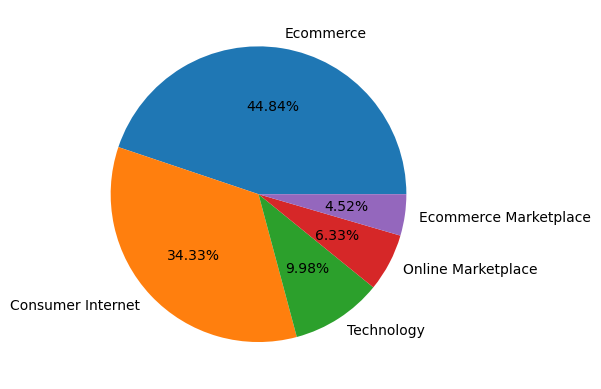

Ecommerce 44.84
Consumer Internet 34.33
Technology 9.98
Online Marketplace 6.33
Ecommerce Marketplace 4.52


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','')
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])


df['IndustryVertical'].replace("eCommerce" ,"Ecommerce", inplace = True)
df['IndustryVertical'].replace("ECommerce" ,"Ecommerce", inplace = True)
df = df.dropna(subset = ['IndustryVertical'])
df = df.dropna(subset= ['AmountInUSD'])
def seperate(IndustryVertical):
    return IndustryVertical.split('&')[0].strip()

df['IndustryVertical'] = df['IndustryVertical'].apply(seperate)
df['IndustryVertical'].replace("E-Commerce" ,"Ecommerce", inplace = True)

industry = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]
top_industry = industry.index
amount = industry.values

plt.pie(amount ,labels = top_industry , autopct = "%.2f%%" )
plt.show()

peramount=np.true_divide(amount, amount.sum())*100
for i in range(len(top_industry)):
    print(top_industry[i],format(peramount[i],'.2f'))

## Top Startup

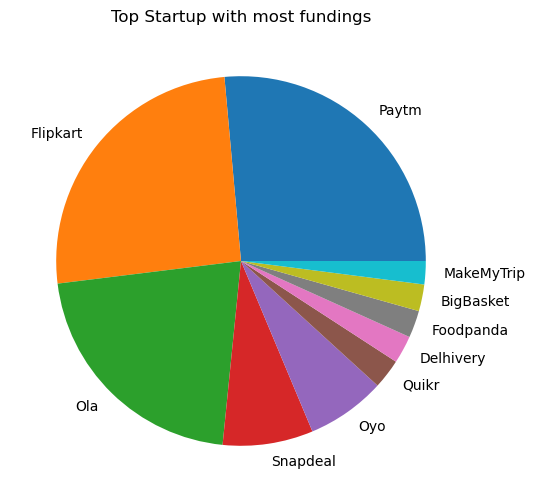

Paytm 26.43
Flipkart 25.52
Ola 21.46
Snapdeal 7.91
Oyo 6.91
Quikr 2.6
Delhivery 2.43
Foodpanda 2.37
BigBasket 2.34
MakeMyTrip 2.03


In [66]:
import numpy as np
import pandas as pd
df = pd.read_csv('startup_funding.csv')

df = df.dropna(subset = ['AmountInUSD'])
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','')
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])
df['StartupName'].replace("Ola Cabs" , "Ola" , inplace = True)
df['StartupName'].replace("Olacabs" , "Ola" , inplace = True)
df['StartupName'].replace("Flipkart.com" , "Flipkart" , inplace = True)
df['StartupName'].replace("Oyo Rooms" , "Oyo" , inplace = True)
df['StartupName'].replace("Paytm Marketplace" , "Paytm" , inplace = True)
df['StartupName'].replace("Oyorooms" , "Oyo" , inplace = True)
df['StartupName'].replace("OyoRooms" , "Oyo" , inplace = True)



startup_count = df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)[:10]
startup = startup_count.index
amount = startup_count.values
percentage = np.true_divide(amount , amount.sum())*100

plt.figure(figsize = (12,6))
plt.pie(amount , labels = startup )
plt.title("Top Startup with most fundings")
plt.show()
for top_startup, perc in zip(startup , percentage):
    print(top_startup , perc.round(2))

## Funding Rounds

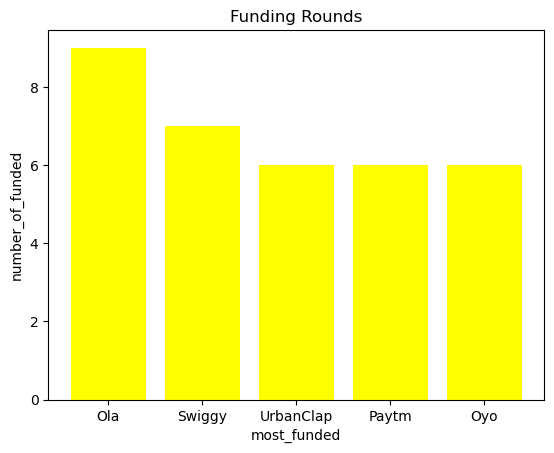

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


In [65]:
import numpy as np
import pandas as pd
df = pd.read_csv('startup_funding.csv')


df['StartupName'].replace("Ola Cabs" , "Ola" , inplace = True)
df['StartupName'].replace("Olacabs" , "Ola" , inplace = True)
df['StartupName'].replace("Flipkart.com" , "Flipkart" , inplace = True)
df['StartupName'].replace("Oyo Rooms" , "Oyo" , inplace = True)
df['StartupName'].replace("Paytm Marketplace" , "Paytm" , inplace = True)
df['StartupName'].replace("Oyorooms" , "Oyo" , inplace = True)
df['StartupName'].replace("OyoRooms" , "Oyo" , inplace = True)
df['StartupName'].replace("OYO Rooms" , "Oyo" , inplace = True)

count = df['StartupName'].value_counts()
a = count.head(5)
most_funded = a.index
number_of_funded= a.values

plt.bar(most_funded , number_of_funded , color = "Yellow")
plt.xlabel("most_funded")
plt.ylabel("number_of_funded")
plt.title("Funding Rounds")
plt.show()
for startup , number in zip(most_funded ,number_of_funded):
    print(startup , number)
    
    

## Top Investors

In [68]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as ply
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.InvestorsName.fillna("",inplace=True)
l=df["InvestorsName"].str.split(',')
# l=list(l)
investor={}
for i in l.values:  
    for j in i:
        temp = j.strip()
        if temp in investor:
            investor[temp]+=1
        else:
            investor[temp]=1

investor=dict(sorted(investor.items(),key=operator.itemgetter(1),reverse=True))
for i in investor:
    if i=="" :
        continue
    print(i,investor[i])
    break

Sequoia Capital 64


## Insights:-

In [ ]:

Paytm startup which have most funding.
Bangalore city have most number of startup.
Ecommerce got more easily funding.
Sequoia Capital , who have invested maximum number of times.


## Author - Riya Rajput